<h1 align='center'>Um <i>tour</i> pelos classificadores de <i>Machine Learning</i> usando <i>Scikit-Learn</i></h1>
<p align='center'><img src=https://i0.wp.com/www.datageeks.com.br/wp-content/uploads/2019/06/Machine-Learning.jpg?fit=900%2C600&ssl=1 heigth=350 width=600></p>
<p align='justify'>Faremos um <i>tour</i> por uma seleção de algoritmos de aprendizado de máquina populares e poderosos que são comumente usados na academia e na indústria. Ao aprender sobre as diferenças entre vários algoritmos de aprendizado supervisionado para classificação, também desenvolveremos uma apreciação de seus pontos fortes e fracos individuais. Além disso, daremos nossos primeiros passos com a biblioteca <i>scikit-learn</i>, que oferece uma <i>interface</i> amigável e consistente para usar esses algoritmos de forma eficiente e produtiva.</p>

<h2>Escolhendo um algoritmo de classificação</h2>
<p align='justify'>Escolher um algoritmo de classificação apropriado para uma tarefa de problema específica requer <b>prática e experiência</b>, cada algoritmo tem suas próprias peculiaridades e é baseado em certas suposições.</p>
<p align='justify'>Na prática, é sempre recomendável comparar o desempenho de pelo menos 3 ou 4 algoritmos de aprendizagem diferentes para selecionar o melhor modelo para o problema específico. Eles podem diferir no número de recursos ou exemplos, na quantidade de ruído em um conjunto de dados e se as classes são linearmente separáveis ou não.</p>

<p align='justify'>Eventualmente, o desempenho de um classificador em termos de performance computacional bem como o seu poder preditivo, depende muito dos dados subjacentes que estão disponíveis para o aprendizado. As cinco principais etapas envolvidas no treinamento, de acordo com <i>Sebastian Raschkal</i>, de um algoritmo de aprendizado de máquina supervisionado podem ser resumidas da seguinte forma:</p>
<ol>
<li>Selecionando recursos e coletando exemplos de treinamento rotulados.</li>
<li>Escolhendo uma métrica de desempenho.</li>
<li>Escolha de um classificador e algoritmo de otimização.</li>
<li>Avaliação do desempenho do modelo.</li>
<li>Ajustando o algoritmo.</li>
</ol>

<h2>Primeiros passos com scikit-learn – treinando um perceptron</h2>
<p align='justify'>Vamos dar uma olhada na API <i>scikit-learn</i>, que combina uma interface amigável e consistente com uma implementação altamente otimizada de vários algoritmos de classificação. A biblioteca <i>scikit-learn</i> oferece não apenas uma grande variedade de algoritmos de aprendizado, mas também muitas funções convenientes para pré-processar dados e ajustar e avaliar nossos modelos.</p>
<p align='jsutify'>Para começar com a biblioteca <i>scikit-learn</i>, treinaremos um modelo <i>perceptron</i>. Para simplificar, usaremos o já familiar conjunto de dados Iris. Convenientemente, o conjunto de dados Iris já está disponível via <i>scikit-learn</i>, pois é um conjunto de dados simples e popular, frequentemente usado para testar e experimentar algoritmos.</p> 

In [2]:
from sklearn import datasets
import numpy as np

# Carregando o dataset Iris 
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
# 0 = Iris Setosa 
# 1 = Iris Versicolor
# 2 = Iris Virgínica

Class labels: [0 1 2]


<p align='justify'>Embora muitas funções e métodos de classe do <i>scikit-learn</i> também funcionem com rótulos de classe em formato de <i>string</i>, o uso de rótulos inteiros é uma abordagem recomendada para evitar falhas técnicas e melhorar o desempenho computacional devido ao uso de memória menor; além disso, codificar rótulos de classe como inteiros é uma convenção comum entre a maioria das bibliotecas de aprendizado de máquina.</p>

In [3]:
# Dividindo os dados em 70% treinamento e 30% teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


<p align='justify'>Aproveitamos o suporte integrado para estratificação via <i>stratify=y</i>. Nesse contexto, estratificação significa que o método <i>train_test_split</i> retorna subconjuntos de treinamento e teste que têm as mesmas proporções de rótulos de classe que o conjunto de dados de entrada.</p>

In [4]:
# Padronizando as Características (normalizando)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<p align='justify'>Observe que usamos os mesmos parâmetros de escala para padronizar o conjunto de dados de teste para que os valores no conjunto de dados de treinamento e de teste sejam comparáveis entre si.</p>

In [5]:
# Treinando o Perceptron via scikit-learn
from sklearn.linear_model import Perceptron


ppn = Perceptron(eta0=0.1, random_state=1) # Instanciando o modelo
ppn.fit(X_train_std, y_train) # Ajustando os dados

y_pred = ppn.predict(X_test_std) # Fazendo predições 
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [6]:
from sklearn.metrics import accuracy_score

# Avaliando a acurárcia do modelo
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred)) # Modo 1 usando o Accuracy_score
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))  # Modo 2 usando o score

Accuracy: 0.978
Accuracy: 0.978


<p align='justify'><b><i>Overfitting</i></b> significa que o modelo captura bem os padrões nos dados de treinamento, mas falha em generalizar bem para dados não vistos.</p>

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')  

C:\Users\willi\AppData\Local\Temp\ipykernel_10140\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


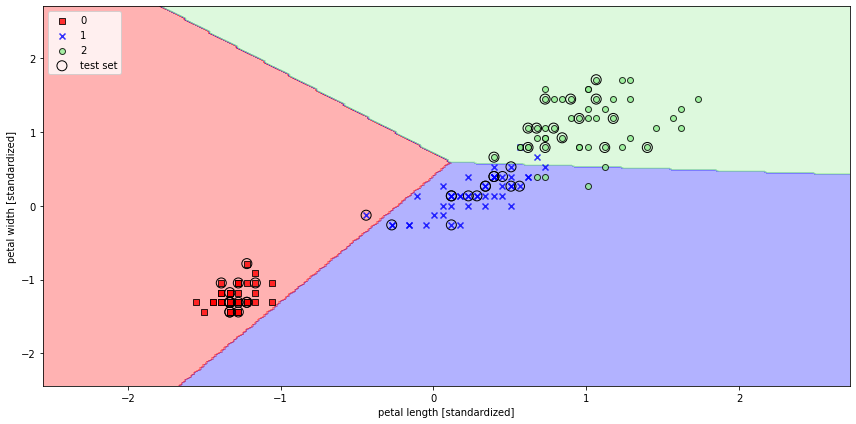

In [8]:
# Treinando um modelo perceptron usando os dados de treinamento padronizados:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(12,6))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

<p align='justify'>Lembrar que o algoritmo <i>perceptron</i> nunca converge em conjuntos de dados que não são perfeitamente separáveis linearmente, razão pela qual o uso do algoritmo <i>perceptron</i> normalmente não é recomendado na prática.</p>

<h2>Modelando probabilidades de classe por meio de regressão logística</h2>
<p align='justify'>Embora a regra do perceptron ofereça uma introdução agradável e fácil aos algoritmos de aprendizado de máquina para classificação, sua maior desvantagem é que ela nunca converge se as classes não forem perfeitamente separáveis linearmente. A tarefa de classificação feita anteriormente seria um exemplo de tal cenário. A razão para isso é que os pesos estão sendo continuamente atualizados, pois sempre há pelo menos um exemplo de treinamento mal classificado presente em cada época. Claro que podemos alterar a taxa de aprendizado e aumentar o número de épocas, mas a ressalva é que o <i>perceptron</i> nunca convergirá neste conjunto de dados.</p>
<p align='justify'>Para aproveitar melhor nosso tempo, vamos agora dar uma olhada em outro algoritmo simples, porém mais poderoso, para problemas de classificação linear e binária: <b>regressão logística</b>. Observe que, apesar do nome, a regressão logística é um modelo de classificação, não de regressão.</p>

<h3>Regressão logística e probabilidades condicionais</h3>
<p align='justify'>A regressão logística é um modelo de classificação muito fácil de implementar e funciona muito bem em classes linearmente separáveis. É um dos algoritmos mais utilizados para classificação na indústria.</p>
<p align='justify'>A regressão logística é usada na previsão do tempo, por exemplo, não apenas para prever se choverá em um determinado dia, mas também para relatar a chance de chuva. Da mesma forma, a regressão logística pode ser usada para prever a chance de um paciente ter uma determinada doença devido a certos sintomas, razão pela qual a regressão logística goza de grande popularidade no campo da medicina.</p>

<h3>Treinando um modelo de regressão logística com scikit-learn</h3>
<p align='justify'>Vamos aprender como usar a implementação mais otimizada de regressão logística do <i>scikit-learn</i>, que também suporta configurações multiclasse prontas para uso. Observe que em versões recentes do <i>scikit-learn</i>, a técnica usada para classificação multiclasse, multinomial ou OvR, é escolhida automaticamente.</p>
<p align="justify">Além disso, definimos <i>multi_class='ovr'</i> para fins de ilustração. Você pode querer comparar os resultados com <i>multi_class='multinomial'</i>. Observe que a configuração multinomial geralmente é recomendada na prática para <b>classes mutuamente exclusivas</b>, como aquelas encontradas no conjunto de dados Iris. Aqui, "mutuamente exclusivo" significa que cada exemplo de treinamento só pode pertencer a uma única classe (em contraste com a classificação multirrótulo, onde um exemplo de treinamento pode ser membro de várias classes).</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_10140\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


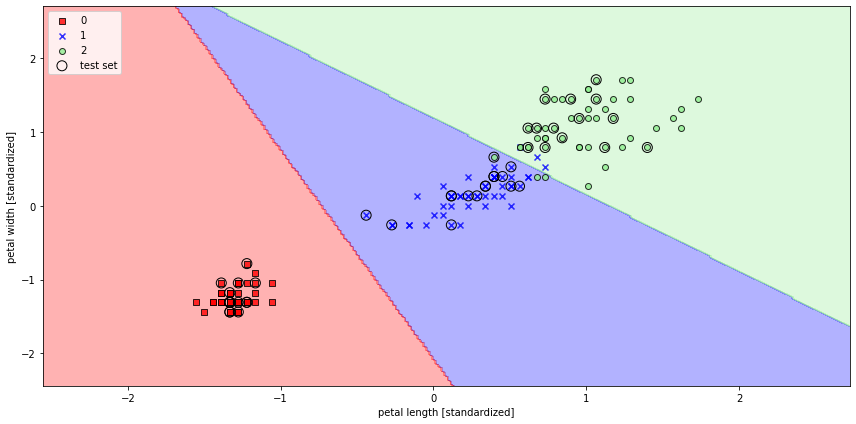

In [9]:
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo.
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')

# Treinando os Dados
lr.fit(X_train_std, y_train)

# Plotando os dados
plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='jsustify'>Observe que existem muitos algoritmos de otimização diferentes para resolver problemas de otimização. Para minimizar as funções de perda convexa, como a perda na regressão logística, recomenda-se usar abordagens mais avançadas do que o <i>Gradient Descent</i> estocástico regular (SGD). Na verdade, o <i>scikit-learn</i> implementa toda uma gama de tais algoritmos de otimização, que podem ser especificados através do parâmetro <i>solver</i>, a saber, <i>'newton-cg', 'lbfgs', 'liblinear', 'sag' e 'saga'</i>.</p>

<p align='justify'>A probabilidade de que os exemplos de treinamento pertençam a uma determinada classe pode ser calculada usando o método <i>predict_proba</i>. Por exemplo, podemos prever as probabilidades dos três primeiros exemplos no conjunto de dados de teste da seguinte forma:</p>

In [10]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [11]:
# A Soma da linha será sempre 1. Que seria igual a 100%.
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [12]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

<p align='justify'>No exemplo de código anterior, calculamos as probabilidades condicionais e as convertemos em rótulos de classe manualmente usando a função <i>argmax</i> do <i>NumPy</i>. Na prática, a maneira mais conveniente de obter rótulos de classe ao usar o <i>scikit-learn</i> é chamar o método de previsão diretamente:</p>

In [14]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

<p align='justify'>Por fim, uma palavra de cautela se você quiser prever o rótulo de classe de um único exemplo de flor: O <i>scikit-learn</i> espera um array bidimensional como entrada de dados; portanto, primeiro temos que converter uma única fatia de linha em tal formato. Uma maneira de converter uma única entrada de linha em uma matriz de dados bidimensional é usar o método <i>reshape</i> do <i>NumPy</i> para adicionar uma nova dimensão, como demonstrado aqui:</p>

In [13]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

<h3>Combatendo o overfitting via regularização</h3>
<p align='justify'>O <i>overfitting</i> é um problema comum em aprendizado de máquina, onde um modelo funciona bem em dados de treinamento, mas não generaliza bem para dados não vistos (dados de teste). Se um modelo sofre de <i>overfitting</i>, também dizemos que o modelo tem uma alta variância, que pode ser causada por ter muitos parâmetros, levando a um modelo muito complexo devido aos dados subjacentes. Da mesma forma, nosso modelo também pode sofrer de <i>underfitting</i> (alto viés), o que significa que nosso modelo não é complexo o suficiente para capturar bem o padrão nos dados de treinamento e, portanto, também sofre de baixo desempenho em dados não vistos.</p>

<h4>O tradeoff viés-variância</h4>
<p align='justify'>Freqüentemente, os pesquisadores usam os termos "viés" e "variância" ou "compensação de viés-variância" para descrever o desempenho de um modelo - ou seja, você pode tropeçar em palestras, livros ou artigos em que as pessoas dizem que um modelo tem um " alta variância" ou "alto viés". Então, o que isso significa? Em geral, podemos dizer que "alta variância" é proporcional ao <i>overfitting</i> e "alto viés" é proporcional ao <i>underfitting</i>.</p>
<p align='justify'>No contexto de modelos de aprendizado de máquina, a variância mede a consistência (ou variabilidade) da previsão do modelo para classificar um exemplo específico se treinarmos novamente o modelo várias vezes, por exemplo, em diferentes subconjuntos do conjunto de dados de treinamento. Podemos dizer que o modelo é sensível à aleatoriedade nos dados de treinamento. Em contraste, o viés mede o quão longe as previsões estão dos valores corretos, em geral, se reconstruirmos o modelo várias vezes em diferentes conjuntos de dados de treinamento; viés é a medida do erro sistemático que não é devido à aleatoriedade.</p>

<p align=justify'>Um forma de encontrar um bom viés-variância é ajustar a complexidade o modelo via regularização. A regularização é util para lidar com a famosa colinearidade, em outras palavras, alta correlação entre as <i>features</i>, filtrando os ruídos dos dados e eventualmente prevenindo o <i>overfitting</i>.

<h4>Regularização e Normalização de Recursos</h4>
<p align='justify'>A regularização é outra razão pela qual o dimensionamento de recursos, como a padronização, é importante. Para que a regularização funcione corretamente, precisamos garantir que todos os nossos recursos estejam em escalas comparáveis.</p>

<h3>Classificação máxima de margem com máquinas de vetor de suporte (SVM)</h3>
<p align='justify'>Outro algoritmo de aprendizado poderoso e amplamente utilizado é o <i>Support Vector Machine</i> (SVM), que pode ser considerada uma extensão do <i>perceptron</i>. Usando o algoritmo <i>perceptron</i>, minimizamos os erros de classificação. No entanto, nos SVMs o nosso objetivo de otimização é maximizar a margem. A margem é definida como a distância entre o hiperplano de separação (limite de decisão) e os exemplos de treinamento mais próximos deste hiperplano, que são os chamados vetores de suporte.</p>

<h4>Lidando com um caso não linearmente separável usando variáveis de folga</h4>
<p align='justify'>Embora não queiramos nos aprofundar muito nos conceitos matemáticos mais envolvidos por trás da classificação de margem máxima, vamos mencionar brevemente a variável de folga, 𝜉𝜉 , que foi introduzida por <i>Vladimir Vapnik</i> em 1995 e levou à chamada margem suave classificação. A motivação para a introdução da variável </i>slack</i> foi que as restrições lineares precisam ser relaxadas para dados não linearmente separáveis para permitir a convergência da otimização na presença de erros de classificação, sob a penalização de custo adequada.</p>

<p align='justify'>Por meio da variável C, podemos controlar a penalidade por classificação incorreta. Grandes valores de C correspondem a grandes penalidades de erro, enquanto somos menos rigorosos quanto a erros de classificação se escolhermos valores menores para C. Podemos então usar o parâmetro C para controlar a largura da margem e, portanto, ajustar a compensação entre viés e variância. Esse conceito está relacionado à regularização, que discutimos na seção anterior no contexto da regressão regularizada, onde diminuir o valor de C aumenta o viés e diminui a variância do modelo.</p>



C:\Users\willi\AppData\Local\Temp\ipykernel_10140\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


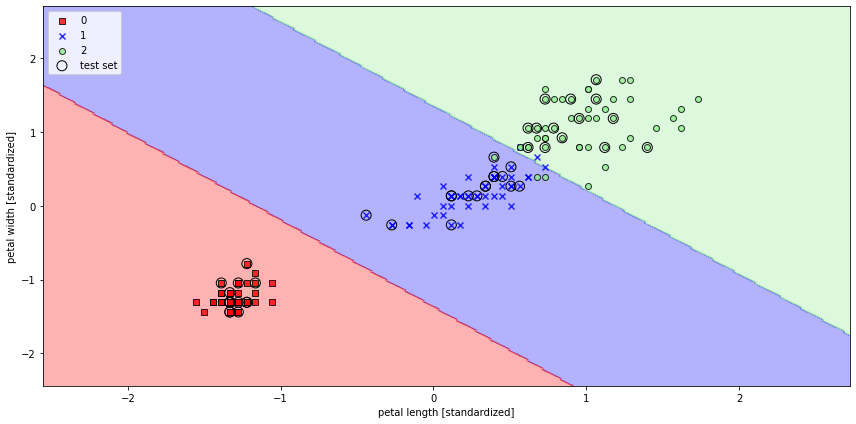

In [15]:
from sklearn.svm import SVC

# Instanciando um Modelo SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)

# Ajustando e treinando o Modelo
svm.fit(X_train_std, y_train)

# Plotando os dados

plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<h4>Regressão logística versus SVMs</h4>

<p align='justify'>Em tarefas práticas de classificação, regressão logística linear e SVMs lineares geralmente produzem resultados muito semelhantes. A regressão logística tenta maximizar as probabilidades condicionais dos dados de treinamento, o que os torna mais propensos a <i>outliers</i> do que os SVMs, que se preocupam principalmente com os pontos mais próximos do limite de decisão (vetores de suporte). Por outro lado, a regressão logística tem a vantagem de ser um modelo mais simples e poder ser implementado com mais facilidade. Além disso, os modelos de regressão logística podem ser facilmente atualizados, o que é atraente quando se trabalha com dados de <i>streaming</i>.</p>

<h3>Implementações alternativas no scikit-learn</h3>